In [1]:
# following https://fair-chem.github.io/legacy_tutorials/data_visualization.html#tags
import matplotlib
matplotlib.use('Agg')

import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'font.family': ' DejaVu Sans',
   'legend.fontsize': 20,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'axes.labelsize': 25,
   'axes.titlesize': 25,
   'text.usetex': False,
   'figure.figsize': [12, 12]
}
matplotlib.rcParams.update(params)


import ase.io
from ase.io.trajectory import Trajectory
from ase.io import extxyz
from ase.calculators.emt import EMT
from ase.build import fcc100, add_adsorbate, molecule
from ase.constraints import FixAtoms
from ase.optimize import LBFGS
from ase.visualize.plot import plot_atoms
from ase import Atoms
from IPython.display import Image

In [2]:
videos_dir = "videos/"
os.makedirs(videos_dir, exist_ok=True)

config = {
    "num_procs": 1,
    "fps": 30,
}

In [3]:
###DATA GENERATION - FEEL FREE TO SKIP###

adslab = fcc100("Cu", size=(3, 3, 3))
adsorbate = molecule("C3H8")
add_adsorbate(adslab, adsorbate, 3, offset=(1, 1)) # adslab = adsorbate + slab

# tag all slab atoms below surface as 0, surface as 1, adsorbate as 2
tags = np.zeros(len(adslab))
tags[18:27] = 1
tags[27:] = 2

adslab.set_tags(tags)

# Fixed atoms are prevented from moving during a structure relaxation. We fix all slab atoms beneath the surface 
cons= FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)
adslab.center(vacuum=13.0, axis=2)
adslab.set_pbc(True)
adslab.set_calculator(EMT())

os.makedirs('data', exist_ok=True)

# Define structure optimizer - LBFGS. Run for 100 steps, or if the max force on all atoms (fmax) is below 0 ev/A.
# fmax is typically set to 0.01-0.05 eV/A, for this demo however we run for the full 100 steps.

dyn = LBFGS(adslab, trajectory="data/toy_c3h8_relax.traj")
dyn.run(fmax=0, steps=100)

traj = ase.io.read("data/toy_c3h8_relax.traj", ":")

# convert traj format to extxyz format (used by OC20 dataset)
columns = (['symbols','positions', 'move_mask', 'tags'])
with open('data/toy_c3h8_relax.extxyz','w') as f:
    extxyz.write_xyz(f, traj, columns=columns)
    
os.system("rm data/toy_c3h8_relax.traj")

       Step     Time          Energy          fmax
LBFGS:    0 16:51:38       15.804700        6.776430
LBFGS:    1 16:51:38       12.190607        4.323222
LBFGS:    2 16:51:38       10.240169        2.265527
LBFGS:    3 16:51:38        9.779223        0.937247
LBFGS:    4 16:51:38        9.671525        0.770173
LBFGS:    5 16:51:38        9.574461        0.663540
LBFGS:    6 16:51:38        9.537502        0.571800
LBFGS:    7 16:51:38        9.516673        0.446620
LBFGS:    8 16:51:38        9.481330        0.461143
LBFGS:    9 16:51:38        9.462255        0.293081
LBFGS:   10 16:51:38        9.448937        0.249010
LBFGS:   11 16:51:38        9.433813        0.237051
LBFGS:   12 16:51:38        9.418884        0.260245
LBFGS:   13 16:51:38        9.409649        0.253162
LBFGS:   14 16:51:38        9.404838        0.162398
LBFGS:   15 16:51:38        9.401753        0.182298
LBFGS:   16 16:51:38        9.397314        0.259163
LBFGS:   17 16:51:38        9.387947        0.34

/var/folders/9p/7dbn98pd4vvb3bnq420r8hzw0000gn/T/ipykernel_7703/2996947630.py:19: DeprecationWarning: Please use atoms.calc = calc
  adslab.set_calculator(EMT())


LBFGS:   19 16:51:38        9.342222        0.433340
LBFGS:   20 16:51:38        9.286822        0.500200
LBFGS:   21 16:51:38        9.249910        0.524052
LBFGS:   22 16:51:38        9.187179        0.511994
LBFGS:   23 16:51:38        9.124811        0.571796
LBFGS:   24 16:51:38        9.066185        0.540934
LBFGS:   25 16:51:38        9.000116        1.079833
LBFGS:   26 16:51:38        8.893632        0.752759
LBFGS:   27 16:51:38        8.845939        0.332051
LBFGS:   28 16:51:38        8.815173        0.251242
LBFGS:   29 16:51:38        8.808721        0.214337
LBFGS:   30 16:51:38        8.794643        0.154611
LBFGS:   31 16:51:38        8.789162        0.201404
LBFGS:   32 16:51:38        8.782320        0.175517
LBFGS:   33 16:51:38        8.780394        0.103718
LBFGS:   34 16:51:38        8.778410        0.107611
LBFGS:   35 16:51:38        8.775079        0.179747
LBFGS:   36 16:51:38        8.766987        0.333401
LBFGS:   37 16:51:38        8.750249        0.

/Users/curtischong/Documents/dev/joule/venv/lib/python3.11/site-packages/ase/io/extxyz.py:311: UserWarning: Skipping unhashable information adsorbate_info
  warnings.warn('Skipping unhashable information '


0

In [4]:
identifier = "toy_c3h8_relax.extxyz"
traj = ase.io.read("data/%s" % identifier, index=":")

<Axes: title={'center': 'final'}>

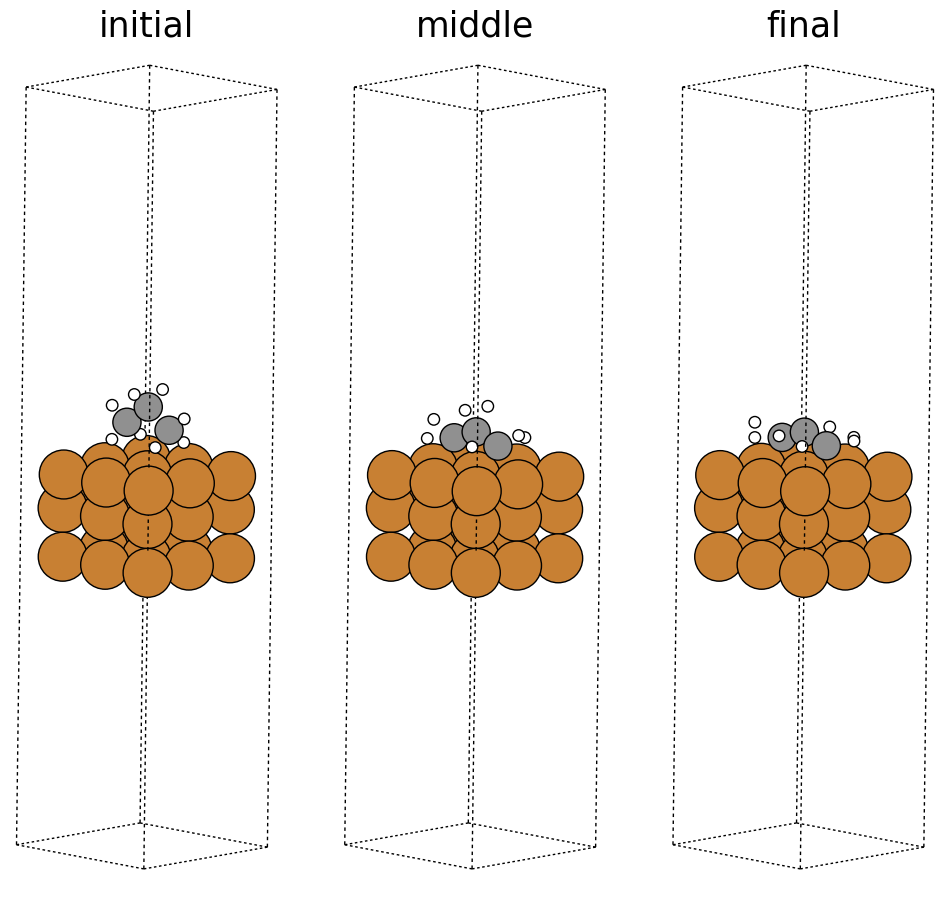

In [5]:
fig, ax = plt.subplots(1, 3)
labels = ['initial', 'middle', 'final']
for i in range(3):
    ax[i].axis('off')
    ax[i].set_title(labels[i])
ase.visualize.plot.plot_atoms(traj[0], ax[0], radii=0.8, rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[50], ax[1], radii=0.8, rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[-1], ax[2], radii=0.8, rotation=("-75x, 45y, 10z"))

In [6]:
import crystal_toolkit

/Users/curtischong/Documents/dev/joule/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
import crystal_toolkit
from pymatgen.core import Structure
import numpy as np
from pymatgen.io.ase import AseAtomsAdaptor


def tile_structure(lattice, species, coordinates, scale):
    tiled_lattice = lattice * scale
    tiled_coordinates_list = []
    tiled_species = []
    for i in range(scale):
        for j in range(scale):
            for k in range(scale):
                new_coords = (coordinates + np.array([i, j, k])) / scale
                tiled_coordinates_list.append(new_coords)
                tiled_species.extend(species)
    tiled_coordinates = np.concatenate(tiled_coordinates_list, axis=0)
    return tiled_lattice, tiled_species, tiled_coordinates

def visualize_sample(atoms, tile_amount=1, is_tags_visible=False):
    structure = AseAtomsAdaptor.get_structure(atoms)
    lattice = structure.lattice.matrix
    species = structure.species
    
    coordinates = [s.coords for s in structure.sites] # IMPORTANT! these are NOT fractional coords
    if is_tags_visible:
        # tag all slab atoms below surface as 0, surface as 1, adsorbate as 2
        species = [s.tags + 1 for s in structure.sites]
        #species = [t + 1 for t in structure.site_properties["tags"]]
    #tiled_lattice, tiled_species, tiled_coordinates = tile_structure(lattice, species, coordinates, tile_amount)
    #display(Structure(tiled_lattice, tiled_species, tiled_coordinates, coords_are_cartesian=True))
    display(Structure(lattice, species, coordinates, coords_are_cartesian=True))
    

visualize_sample(traj[0], 1, True)